# LAPTOP PRICES PREDICTION PROJECT

#### The goal of this project is to predict laptop prices based on features such as brand, weight, RAM, and other specifications. Various machine learning models are implemented, and their performance is evaluated and compared 🙂

For the documentation go to the end ⬇️

In [3]:
import pandas as pd
import numpy as np

## Data Cleaning and Preparation

In [5]:
df=pd.read_csv('LaptopPrices.csv')

In [6]:
df.head(11)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [7]:
df.shape

(1303, 12)

In [8]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [9]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### Preperation

##### 'Ram' Column

In [12]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [13]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [14]:
# df.head()

##### 'Weight' Column

In [16]:
df['Weight'] = df['Weight'].replace(r'[^\d.]', '', regex=True).astype(float)

##### 'Memory' Column

In [18]:
import re

In [19]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [20]:
def process_memory(memory):
    ssd, hdd, flash, hybrid = 0, 0, 0, 0

    components = memory.split('+')
    
    for comp in components:
        size = int(re.search(r'\d+', comp).group())
        
        
        if 'TB' in comp:
            size *= 1000
        if 'SSD' in comp:
            ssd += size
        elif 'HDD' in comp:
            hdd += size
        elif 'Flash Storage' in comp:
            flash += size
        elif 'Hybrid' in comp:
            hybrid += size
    
    return pd.Series([ssd, hdd, flash, hybrid])

df[['Total SSD (GB)', 'Total HDD (GB)', 'Total Flash (GB)', 'Total Hybrid (GB)']] = df['Memory'].apply(process_memory)

df.drop('Memory', axis=1, inplace=True)

In [21]:
# df.head()

##### 'Cpu' Column

In [23]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [24]:
def process_cpu(cpu):
    brand = cpu.split()[0]
    
    series_match = re.search(r'(Core \w+\d+|Ryzen \d+|Xeon|Celeron|Pentium|Atom|A\d+|E\d+|FX|A-Series|Cortex)', cpu)
    series = series_match.group() if series_match else 'Other'
    
    clock_speed_match = re.search(r'(\d+(\.\d+)?)GHz', cpu)
    clock_speed = float(clock_speed_match.group(1)) if clock_speed_match else 0.0
    
    return pd.Series([brand, series, clock_speed])

df[['Cpu Brand', 'Cpu Series', 'Cpu Clock Speed (GHz)']] = df['Cpu'].apply(process_cpu)

df.drop('Cpu', axis=1, inplace=True)

In [25]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),Total Hybrid (GB),Cpu Brand,Cpu Series,Cpu Clock Speed (GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel,Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,128,0,Intel,Core i5,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel,Core i5,2.5


In [26]:
df['Cpu Clock Speed (GHz)'].max()

3.6

In [27]:
df['Cpu Clock Speed (GHz)'].min()

0.9

In [28]:
df['Cpu Brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [30]:
df['Cpu Series'].unique()

array(['Core i5', 'Core i7', 'A9', 'Core i3', 'Other', 'Atom', 'E2', 'A6',
       'Celeron', 'Ryzen 1700', 'Pentium', 'FX', 'Xeon', 'A10', 'A8',
       'A12', 'Ryzen 1600', 'A4', 'Cortex'], dtype=object)

##### 'Gpu' Column

In [32]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [33]:
def process_gpu(gpu):
    brand = gpu.split()[0]
    
    series_match = re.search(r'(Iris|GeForce|Radeon|Quadro|FirePro|Mali|HD|UHD)', gpu)
    series = series_match.group() if series_match else 'Other'
    
    if 'GTX 10' in gpu or 'RX 580' in gpu:
        tier = 'High'
    elif 'GTX' in gpu or 'RX' in gpu:
        tier = 'Mid'
    elif 'HD' in gpu or 'UHD' in gpu:
        tier = 'Low'
    else:
        tier = 'Low'
    
    return pd.Series([brand, series, tier])

df[['Gpu Brand', 'Gpu Series/Model', 'Performance Tier']] = df['Gpu'].apply(process_gpu)

df.drop('Gpu', axis=1, inplace=True)

In [34]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),Total Hybrid (GB),Cpu Brand,Cpu Series,Cpu Clock Speed (GHz),Gpu Brand,Gpu Series/Model,Performance Tier
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,128,0,0,0,Intel,Core i5,2.3,Intel,Iris,Low
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,0,0,128,0,Intel,Core i5,1.8,Intel,HD,Low
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,256,0,0,0,Intel,Core i5,2.5,Intel,HD,Low


##### 'ScreenResolution' Column

In [36]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [37]:
def process_screen_resolution(resolution):

    if 'IPS Panel' in resolution:
        panel_type = 'IPS'
    elif 'Retina Display' in resolution:
        panel_type = 'Retina'
    else:
        panel_type = None
    
    touchscreen = 'Touchscreen' in resolution
    
    resolution_match = re.search(r'(\d+)x(\d+)', resolution)
    if resolution_match:
        width = int(resolution_match.group(1))
        height = int(resolution_match.group(2))
    else:
        width, height = None, None
    
    if width and height:
        if width >= 3840 and height >= 2160:
            category = '4K Ultra HD'
        elif width >= 2560 and height >= 1440:
            category = 'Quad HD+'
        elif width >= 1920 and height >= 1080:
            category = 'Full HD'
        elif width >= 1366 and height >= 768:
            category = 'HD'
        else:
            category = 'Low Resolution'
    else:
        category = None
    
    return pd.Series([panel_type, touchscreen, width, height, category])

df[['Panel Type', 'Touchscreen', 'Width', 'Height', 'Resolution Category']] = df['ScreenResolution'].apply(process_screen_resolution)


df.drop('ScreenResolution', axis=1, inplace=True)


In [38]:
df.head(3)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Total SSD (GB),Total HDD (GB),...,Cpu Series,Cpu Clock Speed (GHz),Gpu Brand,Gpu Series/Model,Performance Tier,Panel Type,Touchscreen,Width,Height,Resolution Category
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,128,0,...,Core i5,2.3,Intel,Iris,Low,IPS,False,2560,1600,Quad HD+
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,0,...,Core i5,1.8,Intel,HD,Low,None,False,1440,900,HD
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,256,0,...,Core i5,2.5,Intel,HD,Low,None,False,1920,1080,Full HD


In [39]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'Total SSD (GB)', 'Total HDD (GB)', 'Total Flash (GB)',
       'Total Hybrid (GB)', 'Cpu Brand', 'Cpu Series', 'Cpu Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Series/Model', 'Performance Tier', 'Panel Type',
       'Touchscreen', 'Width', 'Height', 'Resolution Category'],
      dtype='object')

### Encoding Categorical Values

In [41]:
from sklearn.preprocessing import OneHotEncoder

##### 'Company' Column

In [43]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [44]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Company']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Company']))

In [45]:
df = pd.concat([df.drop('Company', axis=1), encoded_df], axis=1)

In [46]:
df.head(3)

,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,128,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,0,128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,256,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 'OpSys' Column

In [48]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [49]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['OpSys']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['OpSys']))

In [50]:
df = pd.concat([df.drop('OpSys', axis=1), encoded_df], axis=1)

In [51]:
df.head(3)

,Product,TypeName,Inches,Ram,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),Total Hybrid (GB),...,Company_Vero,Company_Xiaomi,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,128,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Macbook Air,Ultrabook,13.3,8,1.34,898.94,0,0,128,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,250 G6,Notebook,15.6,8,1.86,575.00,256,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### 'TypeName' Column

In [53]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2in1_Convertible',
       'Workstation'], dtype=object)

In [54]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['TypeName']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['TypeName']))

In [55]:
df = pd.concat([df.drop('TypeName', axis=1), encoded_df], axis=1)

In [56]:
df.head(3)

,Product,Inches,Ram,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),Total Hybrid (GB),Cpu Brand,...,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,MacBook Pro,13.3,8,1.37,1339.69,128,0,0,0,Intel,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Macbook Air,13.3,8,1.34,898.94,0,0,128,0,Intel,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,250 G6,15.6,8,1.86,575.00,256,0,0,0,Intel,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### 'Cpu Brand' Column

In [58]:
df['Cpu Brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [59]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Cpu Brand']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Cpu Brand']))

In [60]:
df = pd.concat([df.drop('Cpu Brand', axis=1), encoded_df], axis=1)

In [61]:
df.head()

,Product,Inches,Ram,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),Total Hybrid (GB),Cpu Series,...,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu Brand_Intel,Cpu Brand_Samsung
0,MacBook Pro,13.3,8,1.37,1339.69,128,0,0,0,Core i5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Macbook Air,13.3,8,1.34,898.94,0,0,128,0,Core i5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,250 G6,15.6,8,1.86,575.00,256,0,0,0,Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,MacBook Pro,15.4,16,1.83,2537.45,512,0,0,0,Core i7,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,MacBook Pro,13.3,8,1.37,1803.60,256,0,0,0,Core i5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##### 'Cpu Series' Column

In [63]:
df['Cpu Series'].unique()

array(['Core i5', 'Core i7', 'A9', 'Core i3', 'Other', 'Atom', 'E2', 'A6',
       'Celeron', 'Ryzen 1700', 'Pentium', 'FX', 'Xeon', 'A10', 'A8',
       'A12', 'Ryzen 1600', 'A4', 'Cortex'], dtype=object)

In [64]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Cpu Series']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Cpu Series']))

In [65]:
df = pd.concat([df.drop('Cpu Series', axis=1), encoded_df], axis=1)

##### 'Gpu Brand' Column

In [67]:
df['Gpu Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [68]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Gpu Brand']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gpu Brand']))

In [69]:
df = pd.concat([df.drop('Gpu Brand', axis=1), encoded_df], axis=1)

##### 'Gpu Series/Model' Column

In [71]:
df['Gpu Series/Model'].unique()

array(['Iris', 'HD', 'Radeon', 'GeForce', 'UHD', 'Other', 'Quadro',
       'FirePro', 'Mali'], dtype=object)

In [72]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Gpu Series/Model']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gpu Series/Model']))

In [73]:
df = pd.concat([df.drop('Gpu Series/Model', axis=1), encoded_df], axis=1)

##### 'Performance Tier' Column

In [75]:
df['Performance Tier'].unique()

array(['Low', 'High', 'Mid'], dtype=object)

In [76]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Performance Tier']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Performance Tier']))

In [77]:
df = pd.concat([df.drop('Performance Tier', axis=1), encoded_df], axis=1)

##### 'Panel Type' Column

In [79]:
df['Panel Type'].unique()

array(['IPS', None], dtype=object)

In [80]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Panel Type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Panel Type']))

In [81]:
df = pd.concat([df.drop('Panel Type', axis=1), encoded_df], axis=1)

##### 'Resolution Category' Column

In [83]:
df['Resolution Category'].unique()

array(['Quad HD+', 'HD', 'Full HD', '4K Ultra HD'], dtype=object)

In [84]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = encoder.fit_transform(df[['Resolution Category']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Resolution Category']))

In [85]:
df = pd.concat([df.drop('Resolution Category', axis=1), encoded_df], axis=1)

##### 'Product' Column

In [87]:
df['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [88]:
from sklearn.feature_extraction.text import HashingVectorizer

In [89]:
hashing_vectorizer = HashingVectorizer(n_features=10, alternate_sign=False)

hashed_features = hashing_vectorizer.transform(df['Product'])

hashed_features_df = pd.DataFrame(hashed_features.toarray(), columns=[f'hashed_feature_{i}' for i in range(hashing_vectorizer.n_features)])

df_transformed = pd.concat([df.drop(columns=['Product']), hashed_features_df], axis=1)

In [90]:
pd.set_option('display.max_columns', None)
df_transformed.head()

,Inches,Ram,Weight,Price_euros,Total SSD (GB),Total HDD (GB),Total Flash (GB),Total Hybrid (GB),Cpu Clock Speed (GHz),Touchscreen,Width,Height,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu Brand_Intel,Cpu Brand_Samsung,Cpu Series_A12,Cpu Series_A4,Cpu Series_A6,Cpu Series_A8,Cpu Series_A9,Cpu Series_Atom,Cpu Series_Celeron,Cpu Series_Core i3,Cpu Series_Core i5,Cpu Series_Core i7,Cpu Series_Cortex,Cpu Series_E2,Cpu Series_FX,Cpu Series_Other,Cpu Series_Pentium,Cpu Series_Ryzen 1600,Cpu Series_Ryzen 1700,Cpu Series_Xeon,Gpu Brand_ARM,Gpu Brand_Intel,Gpu Brand_Nvidia,Gpu Series/Model_GeForce,Gpu Series/Model_HD,Gpu Series/Model_Iris,Gpu Series/Model_Mali,Gpu Series/Model_Other,Gpu Series/Model_Quadro,Gpu Series/Model_Radeon,Gpu Series/Model_UHD,Performance Tier_Low,Performance Tier_Mid,Panel Type_None,Resolution Category_Full HD,Resolution Category_HD,Resolution Category_Quad HD+,hashed_feature_0,hashed_feature_1,hashed_feature_2,hashed_feature_3,hashed_feature_4,hashed_feature_5,hashed_feature_6,hashed_feature_7,hashed_feature_8,hashed_feature_9
0,13.3,8,1.37,1339.69,128,0,0,0,2.3,False,2560,1600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,13.3,8,1.34,898.94,0,0,128,0,1.8,False,1440,900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.0,0.0,0.707107,0.0
2,15.6,8,1.86,575.00,256,0,0,0,2.5,False,1920,1080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.707107,0.0,0.000000,0.0,0.0,0.707107,0.0,0.0,0.000000,0.0
3,15.4,16,1.83,2537.45,512,0,0,0,2.7,False,2880,1800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,13.3,8,1.37,1803.60,256,0,0,0,3.1,False,2560,1600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [91]:
# df_transformed['Price_euros'].min()

In [92]:
# df_transformed['Price_euros'].max()

## Data Splitting

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
df_transformed.shape

(1303, 90)

In [96]:
X = df_transformed.drop(columns=['Price_euros'])
y = df_transformed['Price_euros']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1042, 89)
Test data shape: (261, 89)


## Modelling

### Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
model = LinearRegression()

In [103]:
model.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = model.predict(X_test)

In [105]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)  

In [106]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared score:", r2)

Root Mean Squared Error (RMSE): 316.17365235791567
R-squared score: 0.8031885054808843


###  Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
dt_regressor = DecisionTreeRegressor(random_state=42)

In [110]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [111]:
y_pred_dt = dt_regressor.predict(X_test)

In [112]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [113]:
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R-squared score: {r2_dt}")

Root Mean Squared Error (RMSE): 398.1497122629825
R-squared score: 0.6879013289417498


### Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [117]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [118]:
y_pred_rf = rf_regressor.predict(X_test)

In [119]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [120]:
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared score: {r2_rf}")

Root Mean Squared Error (RMSE): 294.14922574177086
R-squared score: 0.8296529856476178


### Gradient Boost Regressor

In [122]:
from sklearn.ensemble import GradientBoostingRegressor

In [123]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [124]:
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [125]:
y_pred_gb = gb_regressor.predict(X_test)

In [126]:
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

In [127]:
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared score: {r2_gb}")

Root Mean Squared Error (RMSE): 260.37219960483276
R-squared score: 0.8665285646223662


### Support Vector Regressor

In [129]:
from sklearn.svm import SVR

In [130]:
svr_regressor = SVR(kernel='rbf')

In [131]:
svr_regressor.fit(X_train, y_train)

SVR()

In [132]:
y_pred_svr = svr_regressor.predict(X_test)

In [133]:
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

In [134]:
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R-squared score: {r2_svr}")

Root Mean Squared Error (RMSE): 705.4735634566525
R-squared score: 0.020147748802283982


### Comparison

In [136]:
models = {
    'Linear Regression': {'RMSE': rmse, 'R2': r2},
    'Decision Tree Regressor': {'RMSE': rmse_dt, 'R2': r2_dt},
    'Random Forest Regressor': {'RMSE': rmse_rf, 'R2': r2_rf},
    'Gradient Boosting Regressor': {'RMSE': rmse_gb, 'R2': r2_gb},
    'Support Vector Regressor': {'RMSE': rmse_svr, 'R2': r2_svr}
}


model_comparison = pd.DataFrame(models)
print(model_comparison)


      Linear Regression  Decision Tree Regressor  Random Forest Regressor  \
RMSE         316.173652               398.149712               294.149226   
R2             0.803189                 0.687901                 0.829653   

      Gradient Boosting Regressor  Support Vector Regressor  
RMSE                   260.372200                705.473563  
R2                       0.866529                  0.020148  


In [137]:
import matplotlib.pyplot as plt

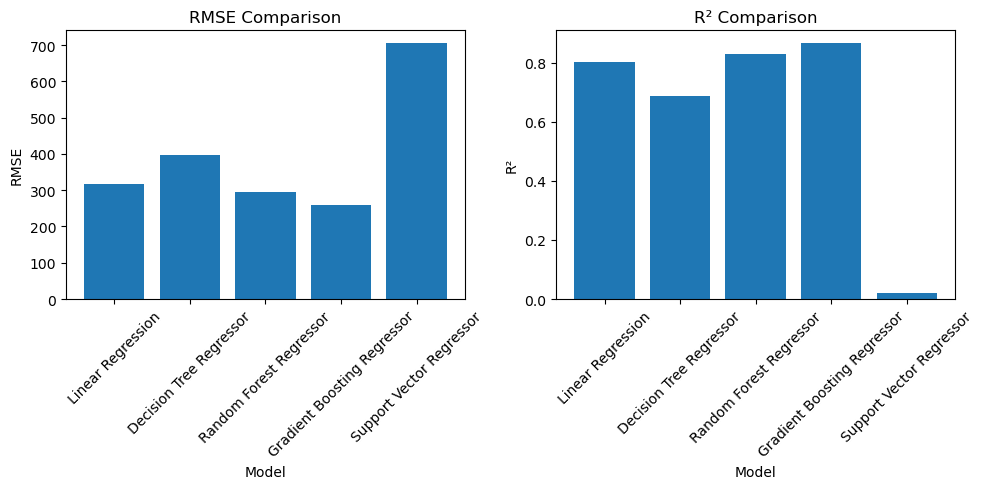

In [138]:
plt.figure(figsize=(10, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.bar(models.keys(), model_comparison.loc['RMSE'])
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# R² Plot
plt.subplot(1, 2, 2)
plt.bar(models.keys(), model_comparison.loc['R2'])
plt.title('R² Comparison')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## DOCUMENTATION

### 1. Objective

As I told you in the beginning, the project's objective is predicting laptop prices using giving features: Company, Product, 

### 2. Dataset Description

The dataset used in this project is 'laptop_prices.csv', containing information about laptops and their prices.
Dataset's shape is (1303, 12), meaning there are 1303 rows and 12 columns.

#### 2.1 Column descriptions

Company: The manufacturer or brand of the laptop (e.g., Dell, HP, Apple).

Product: The specific model or product name of the laptop. This provides detailed identification of the laptop.

TypeName: The type or category of the laptop (e.g., Ultrabook, Gaming, Notebook). 

Inches: The size of the laptop screen, measured diagonally in inches. 

ScreenResolution: The resolution of the laptop's screen (e.g., 1920x1080, 2560x1440). 

Cpu: The processor (Central Processing Unit) model and brand in the laptop.

Ram: The size of the laptop's Random Access Memory, typically measured in GB (e.g., 8GB, 16GB). 

Memory: The storage capacity and type (e.g., 256GB SSD, 1TB HDD).

Gpu: The Graphics Processing Unit in the laptop, used for rendering graphics (e.g., NVIDIA GTX 1050, Intel Integrated).

OpSys: The operating system installed on the laptop (e.g., Windows, macOS, Linux).

Weight: The weight of the laptop, typically measured in kilograms (e.g., 1.5kg).

Price_euros: The price of the laptop in Euros. This is the target variable for prediction in this analysis.

### 3. Preprocessing/Cleaning Descriptions

There was not any null values in the dataset.

### 3.1 Cleaning Description

#### 3.1.1 'Ram' Column

The 'Ram' column originally contained values in the format '4GB'.
During preprocessing, the 'GB' suffix was removed, and the column was converted to a numeric format, retaining only the numeric values. This conversion ensured that the data could be used effectively for numerical analysis and modeling.

#### 3.1.2 'Weight' Column

The 'Weight' column originally contained values in the format '1.2kg'.
During preprocessing, the 'kg' suffix was removed, and the column was converted to a numeric format, retaining only the numeric values.

#### 3.1.3 'Memory' Column

128GB SSD
The 'Memory' column originally contained values in the format '128GB SSD'.
During preprocessing, these values were split into separate numeric and categorical components, allowing the storage capacity to be treated as a numerical feature and the storage type as a categorical feature.

#### 3.1.4 'Cpu' Column

The Cpu column originally contained detailed descriptions of the processor, such as 'Intel Core i5 7200U 2.5GHz', which included the manufacturer, model, generation, and clock speed. During preprocessing, these values were parsed to extract meaningful features, such as the processor brand, series and generation. 

#### 3.1.5 'Gpu' Column

The 'Gpu' column initially contained detailed descriptions of the graphics processing unit, such as 'NVIDIA GeForce GTX 1050'. These values included the GPU brand (NVIDIA), series(GeForce GTX), and specific model(1050). During preprocessing, this column was parsed to extract key features like the GPU manufacturer and series and performance tier.

#### 3.1.6 'ScreenResolution' Column

The ScreenResolution column initially contained detailed information about the display resolution and features, such as '1920x1080 Full HD' or '1366x768 Touchscreen'. These values were parsed to extract specific attributes like:

Resolution dimensions (width: 1920, height: 1080).
Screen type features (Touchscreen, Full HD, 4K).

### 3.2 Encoding Values

Encoding was applied to categorical columns to convert their non-numeric values into numeric representations, making them suitable for machine learning models. Techniques such as one-hot encoding and feature hashing were used, depending on the nature of the column.

#### 3.2.1 'Company' Column

The 'Company' column originally contained the brand name of the laptop, such as 'Dell', 'Apple', or 'HP'. They were encoded into numerical representations using one-hot encoding. 
Company_Dell, Company_Apple, and Company_HP were created.

#### 3.2.2 'OpSys' Column

The 'OpSys' column, which originally contained the operating system of each laptop (e.g., Windows 10, MacOS, Linux), was transformed into a numerical format using One-Hot Encoding. 
OpSys_Windows, OpSys_MacOS, OpSys_Linux, and OpSys_No OS etc. were created

#### 3.2.3 'TypeName' Column

The 'TypeName' column, which originally contained the category system of each laptop (e.g., Gaming, Ultrabook), was transformed into a numerical format using One-Hot Encoding. 
TypeName_Ultrabook, TypeName_Gaming, TypeName_Notebook, and TypeName_Workstation columns were created.

#### 3.2.4 'Cpu Brand' Column

 The 'Cpu Brand' Column that is generated from 'Cpu' column before contained the  cpu brand of each laptop.(e.g., Intel, AMD, Samsung), was transformed into a numerical format using One-Hot-Encoding. Cpu Brand_Intel, Cpu Brand_Samsung etc. columns were created.

#### 3.2.5 'Cpu Series' Column

The 'Cpu Series' Column that is generated from 'Cpu' column before contained the cpu series of each laptop.(e.g., Core i5, Core i7), was transformed into a numerical format using One-Hot-Encoding. Cpu Series_Core i5, Cpu Series_Core i7 etc. columns were created.

#### 3.2.6 'Gpu Brand' Column

The 'Gpu Series' Column that is generated from 'Gpu' column before contained the gpu brand of each laptop.(e.g., Nvidia, ARM), was transformed into a numerical format using One-Hot-Encoding. Gpu Brand_Intel, Gpu Brand_Nvidia etc. columns were created.

#### 3.2.7 'Gpu Model/Series' Column

The 'Gpu Model/Series' Column that is generated from 'Gpu' column before contained the gpu series of each laptop.(e.g., Iris, HD, Radeon), was transformed into a numerical format using One-Hot-Encoding. Gpu Series/Model_HD, Gpu Series/Model_Iris etc. columns were created.

#### 3.2.8 'Performance Tier' Column

The 'Performance Tier' Column that is generated from 'Gpu' column before contained the performance ability of each laptop.(e.g., Low, High, Mid), was transformed into a numerical format using One-Hot-Encoding. Performance Tier_Low, Performance Tier_Mid etc. columns were created.

#### 3.2.9 'Panel Type' Column

The 'Panel Type' Column that is generated from 'ScreenResolution' column before contained values: IPS, None etc., was transformed into a numerical format using One-Hot-Encoding. Panel Type_None, Panel Type_IPS etc. columns were created.

#### 3.2.10 'Resolution Category' Column

The 'Resolution Category' Column that is generated from 'ScreenResolution' column before contained values like: Quad HD+, HD etc., was transformed into a numerical format using One-Hot-Encoding. Resolution Category_Full HD, Resolution Category_HD etc. columns were created.

#### 3.2.11 'Product' Column

The 'Product' Column contained values like: Quad HD+, HD MacBook Pro, Macbook Air etc., was transformed into a numerical format using HashingVectorizer as there were a lot of unique values. hashed_feature_0, hashed_feature_1 etc. columns were created.

### 4. Dataset Splitting Description

The dataset was split into training and testing subsets:
Training Set: 80% of the data, used to train the models.
Testing Set: 20% of the data, reserved for evaluating model performance.

The splitting was performed using the train_test_split function from the sklearn.model_selection library, ensuring a random and representative division of the dataset.

### 5. Models Implemented Description

This prediction task is Supervised Machine Learning, specifically a Regression task because we are predicting a continuous numerical value using labeled data. And because of that, I choose 5 ML models to use and compare.

Models used:
Linear Regression,
Decision Tree Regressor,
Random Forest Regressor,
Gradient Boosting Regressor,
Support Vector Regressor (SVR)

### 6. Metrics for Evaluation

Metrics used for evalution: 

Root Mean Squared Error (RMSE): Measures the average prediction error.

R-squared Score (R²): Indicates how well the model explains variance in the data.

### 7. Insights

Gradient Boosting Regressor had the best performance with the lowest RMSE (260.372) and highest R² (0.866529).

Support Vector Regressor did not perform well, likely due to the lack of feature scaling.

Gradient Boosting Regressor was identified as the most effective model for predicting laptop prices. Future improvements could include adding more features or optimizing hyperparameters further.